## Introduction to Xarray

This notebook will walk through the basics of using xarray to filter, visualise and analyse a dataset. The examples below use [Planet's Forest Carbon Monitoring](https://docs.cecil.earth/Forest-Carbon-Monitoring-111ef16bbbe4817aa1a8dce6d9216665) dataset. If you would like to run this notebook for yourself, just swap out the data request ID for one of your own. Note that you may need to change some variable names and timestamps to align with the dataset you're working with. 

In [ ]:
import cecil
import xarray
import matplotlib.pyplot as plt

client = cecil.Client()

### Section Overview

[Examine dataset structure](#examine-dataset-stucture): Understand dimensions, coordinates and data variables.

[Filtering data](#subset-by-variable-andor-time): Filter by time, variable, or both.

[Visualisation](#visualising-data): Visualise the data as maps, timeseries charts, or scatter plots and explore some commonly used configuration options. 

[Analysis](#analysing-the-data): Walk through a use case of calculating total carbon stored in an AOI.

### Examine dataset stucture

Raster data on Cecil is delivered in the form of an Xarray Dataset. A ['Dataset'](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset) is one of the data structures within the Xarray library. A single Dataset contains one or more [DataArrays](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray), which correspond to different data variables. 

Xarray Datasets have four key properties:

- `dims`: dictionary that maps dimension names to the length of the dimension. For example, the dimensions {'x': 1500, 'y': 1000, 'time': 8} would correspond to a dataset with 1500 pixels in the x direction, 1000 pixels in the y direction, and 8 timesteps. 
- `data_vars`: dict-like container of variables, where each data variable is represented as a single DataArray.
- `coords`: dict-like container of DataArrays that are used to label points along the dataset's dimensions. For example, arrays respresenting each x and y coordinate value present in the Dataset, or datetime objects indicating the timesteps.
- `attrs`: dictionary holding metadata associated with the dataset. 

Each raster dataset available on Cecil is delivered as an Xarray Dataset object. We can explore how these datasets are represented below:

First, replace the data request id below with one of your own to load the xarray representation of that dataset. The output of the following cell will be an interactive representation of the dataset, but you can also visualise similar information by running `print(ds)`. 

In [2]:
ds = client.load_xarray('c572bb90-84b8-42f1-884a-94f83acb6a5b')
ds

<xarray.Dataset> Size: 27MB
Dimensions:                                                  (x: 439, y: 361,
                                                              time: 14)
Coordinates:
  * x                                                        (x) float64 4kB ...
  * y                                                        (y) float64 3kB ...
    spatial_ref                                              int64 8B 0
  * time                                                     (time) datetime64[ns] 112B ...
Data variables:
    canopy_cover_uncertainty_upper_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover_uncertainty_lower_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover                                             (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density                          (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_lower_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_upper_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_upper_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_lower_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height                                            (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
Attributes:
    provider_name:    Planet
    dataset_id:       4d8bd6ba-b751-4c46-8e70-5000e6d8b212
    dataset_name:     Forest Carbon Monitoring
    dataset_crs:      EPSG:4326
    aoi_id:           7dbbf7c3-0447-45a7-8849-e031c6099c1c
    data_request_id:  c572bb90-84b8-42f1-884a-94f83acb6a5b

To get a list of all the data variables included in a dataset, you can run the following:

In [3]:
ds.data_vars

Data variables:
    canopy_cover_uncertainty_upper_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover_uncertainty_lower_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover                                             (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density                          (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_lower_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_upper_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_upper_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncerta

Now we can explore how to get started analysing this xarray dataset.

### Subset by variable and/or time

Selecting a single variable returns a 3D DataArray object of that variable for all available timesteps. 

In [4]:
canopy_cover_ds = ds['canopy_cover']
canopy_cover_ds

<xarray.DataArray 'canopy_cover' (time: 14, y: 361, x: 439)> Size: 2MB
dask.array<concatenate, shape=(14, 361, 439), dtype=uint8, chunksize=(1, 361, 439), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 4kB 132.5 132.5 132.5 132.5 ... 132.5 132.5 132.5
  * y            (y) float64 3kB -12.72 -12.72 -12.72 ... -12.73 -12.73 -12.73
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 112B 2020-12-21 2021-03-21 ... 2024-03-21
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

We can also filter by time to get all the variables for a certain timestep or time range. Note that this dataset is quarterly, so there are four timesteps available for the year 2022 (2022-03-21, 2022-06-21, 2022-09-21, and 2022-12-21). Filtering for '2022' returns all variables for all four of these timesteps. 

In [5]:
ds_2022 = ds.sel(time='2022')
print(ds_2022.time.values)

['2022-03-21T00:00:00.000000000' '2022-06-21T00:00:00.000000000'
 '2022-09-21T00:00:00.000000000' '2022-12-21T00:00:00.000000000']


Alternatively, you can filter by providing an index rather than a specific time:

In [6]:
ds_first = ds.isel(time=0)
print(ds_first.time.values)

2020-12-21T00:00:00.000000000


We can combine to filter for specific variables and specific times like this:

In [7]:
canopy_cover_q2_2022 = ds['canopy_cover'].sel(time='2022-03-21')
canopy_cover_q2_2022

<xarray.DataArray 'canopy_cover' (y: 361, x: 439)> Size: 158kB
dask.array<getitem, shape=(361, 439), dtype=uint8, chunksize=(361, 439), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 4kB 132.5 132.5 132.5 132.5 ... 132.5 132.5 132.5
  * y            (y) float64 3kB -12.72 -12.72 -12.72 ... -12.73 -12.73 -12.73
    spatial_ref  int64 8B 0
    time         datetime64[ns] 8B 2022-03-21
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

### Visualising data

Xarray provides a wrapper around matplotlib to allow for simple visualisation. This section will explore some basic visualisation options, but the [Xarray User Guide on Plotting](https://docs.xarray.dev/en/stable/user-guide/plotting.html#plotting) contains many more examples of interesting and useful plots. 

The simplest plot can be achieved by filtering the dataset to get a single 2D array (i.e. a single variable for a single timestep) and then plotting using the built in .plot() function.

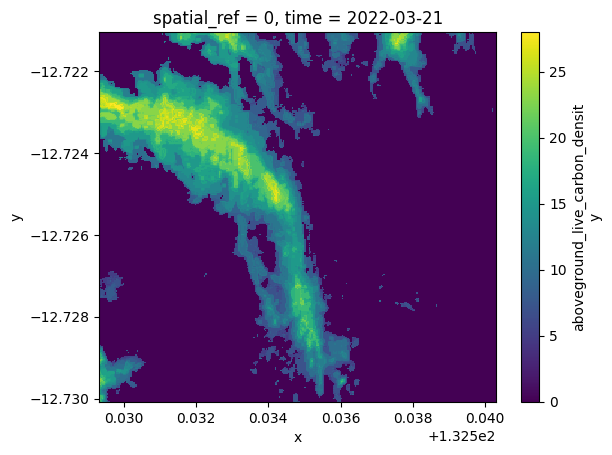

In [8]:
acd_q2_2022 = ds['aboveground_live_carbon_density'].sel(time='2022-03-21')
acd_q2_2022.plot()

The plots can be adjusted further by passing in matplotlib arguments. Some commonly used ones include:

- `cmap`: Specify a colormap of interest. Some colormaps included with matplotlib are listed [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html#colormap-reference).
- `vmin` and `vmax`: Specify the upper and lower limits for plotting the values.


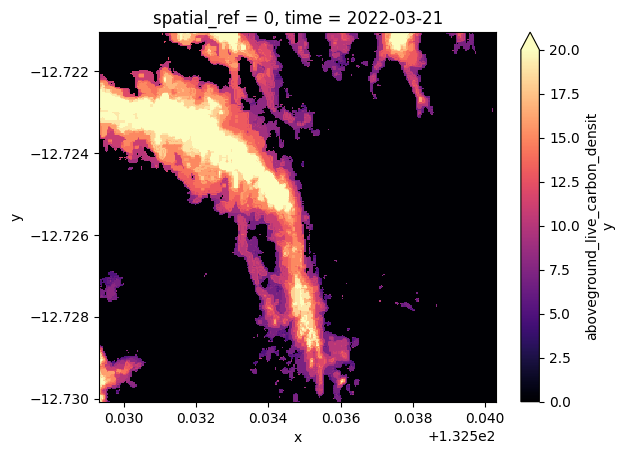

In [9]:
acd_q2_2022.plot(cmap='magma', vmin=0, vmax=20)

If you want to plot discrete categories rather than continuous pixel values, you can use the parameter `levels` to specify where category boundaries should be defined. 

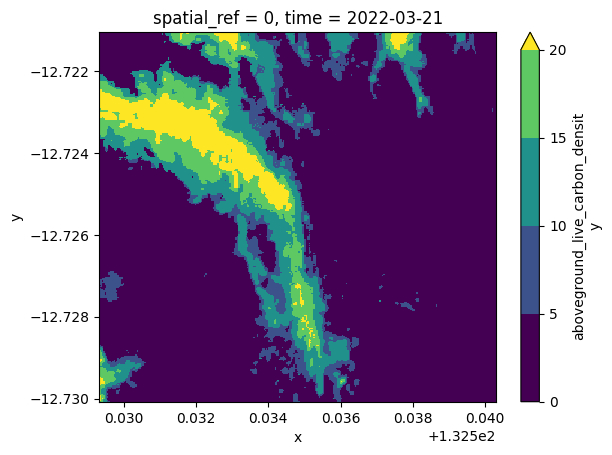

In [10]:
acd_q2_2022.plot(levels=[0, 5, 10, 15, 20])

To plot many timesteps at once, you can create faceted plots:

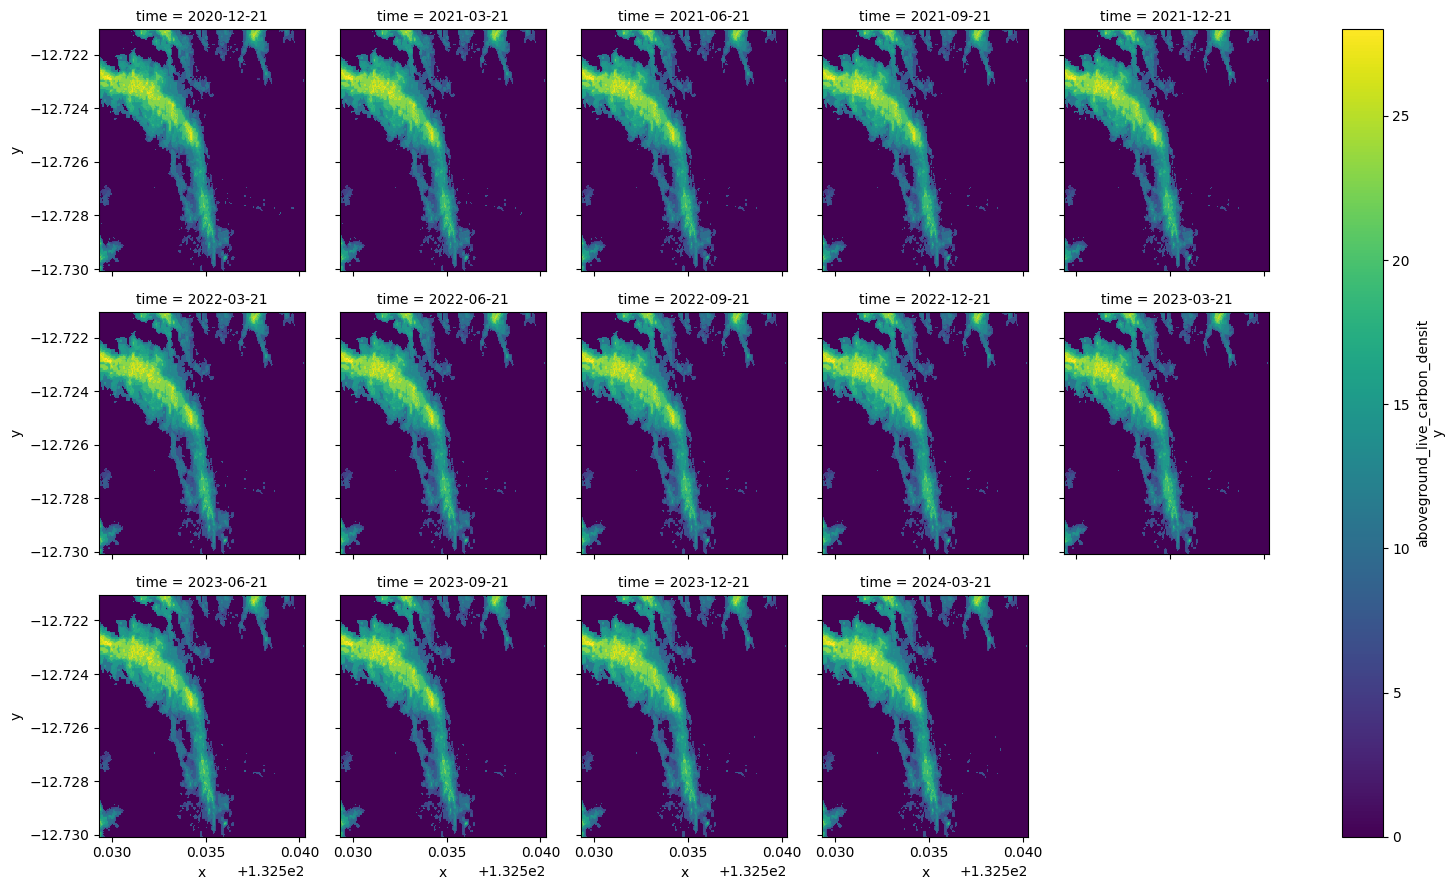

In [11]:
acd = ds['aboveground_live_carbon_density']
acd.plot(x="x", y="y", col="time", col_wrap=5)

At the dataset level, it is possible to compare variables to each other on a scatter plot. In the following example, we look at the relationship between canopy cover and aboveground live carbon density, and then color the points based on their canopy height.

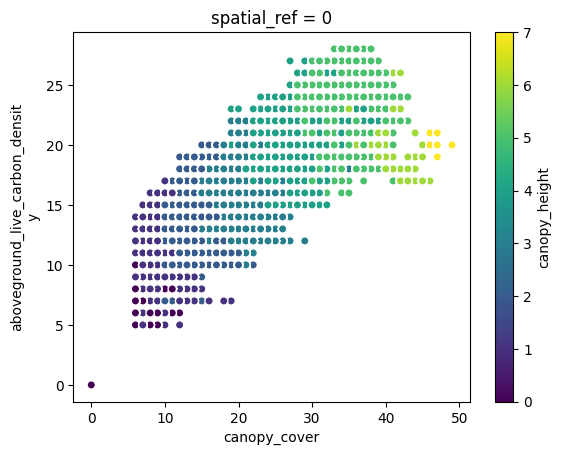

In [12]:
ds.plot.scatter(x='canopy_cover', y='aboveground_live_carbon_density', hue='canopy_height')

Xarray also makes it simple to plot a timeseries chart. To view the pixel-level variation through time, select one pixel and then the .plot() function will generate a timeseries chart by default. 

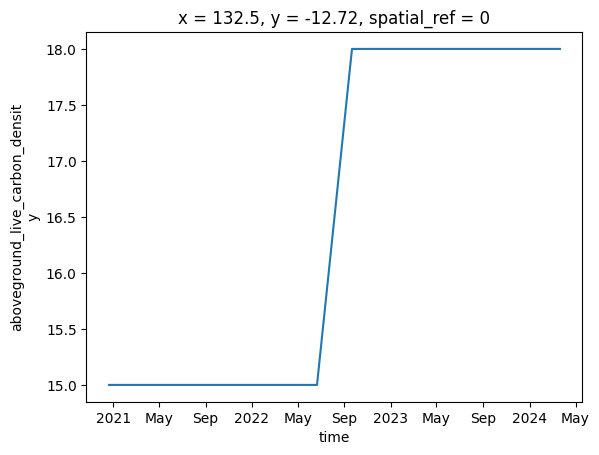

In [13]:
acd_1d = acd.isel(x=50, y=60)
acd_1d.plot()

### Analysing the data

Once the data is loaded as an xarray object, many different analyses can be performed on the data in a few lines of code. The example below demonstrates one method to calculate the total carbon stored within an AOI.

**Calculate total carbon stored within an AOI.**

With xarray, you can use the .mean() function to calculate the mean value across the dimensions specified. In this case, we specify that we want to calculate the mean in the x and y dimensions so that we get an average aboveground carbon density value for the whole AOI, but we maintain each timestep. 

In [14]:
avg_acd = ds['aboveground_live_carbon_density'].mean(dim=['x', 'y'])
avg_acd

<xarray.DataArray 'aboveground_live_carbon_density' (time: 14)> Size: 112B
dask.array<mean_agg-aggregate, shape=(14,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 112B 2020-12-21 2021-03-21 ... 2024-03-21

Next, we can calculate the area of the AOI that was used for this data request. The AOI id is stored in a dataset-level attribute that can be accessed like this: `ds.attrs['aoi_id']`

In [15]:
aoi_area = client.get_aoi(ds.attrs['aoi_id']).hectares
print(f"AOI area: {aoi_area:.2f} hectares")

AOI area: 118.12 hectares


Finally, multiplying the mean aboveground carbon density in Mg C per hectare by the AOI area in hectares will give us the total aboveground carbon density in Mg of carbon for this AOI. Note that across very large AOIs, the difference in pixel sizes across latitudes can begin to impact these results and a different approach may be recommended.

In [16]:
total_carbon = (avg_acd * aoi_area)
total_carbon

<xarray.DataArray 'aboveground_live_carbon_density' (time: 14)> Size: 112B
dask.array<mul, shape=(14,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 112B 2020-12-21 2021-03-21 ... 2024-03-21

Plot timeseries of result.

Text(0, 0.5, 'Total aboveground live carbon (Mg)')

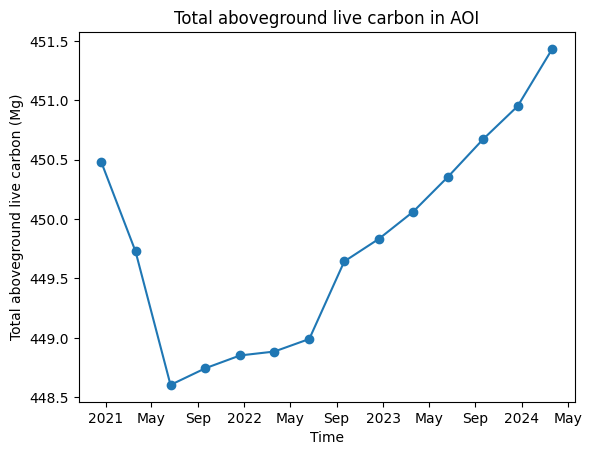

In [17]:
total_carbon.plot(marker='o')
plt.title("Total aboveground live carbon in AOI")
plt.xlabel("Time")
plt.ylabel("Total aboveground live carbon (Mg)")